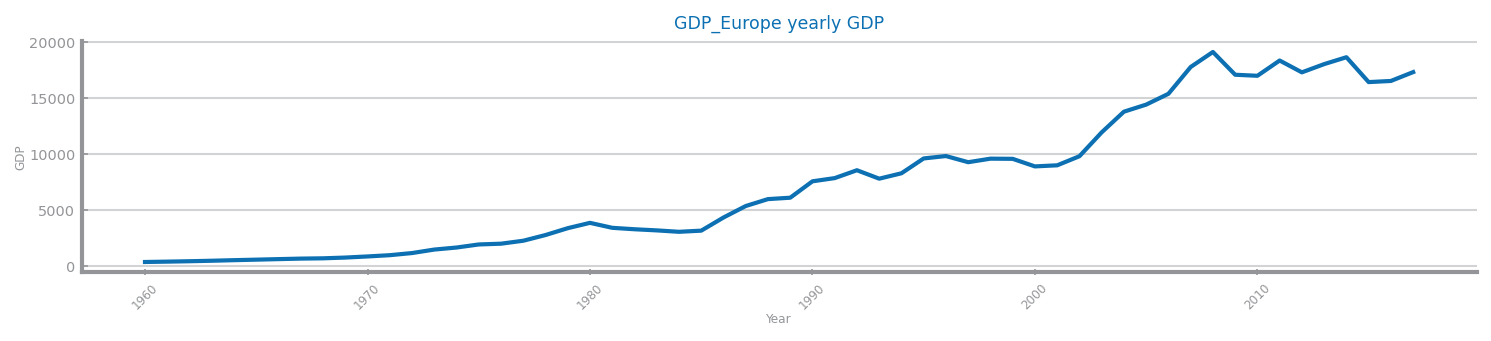

In [1]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

# File details
file_tag = "GDP_Europe"
filename = "/Users/dominikfrank/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/Semester 1/PII/Data Science/Code for Project/DataScience/forecast_gdp_europe.csv"
index = "Year"
target = "GDP"

# Load the dataset
data: DataFrame = read_csv(
    filename,
    sep=",",  # Comma-separated values
    decimal=".",  # Use period for decimal
    parse_dates=[index],  # Parse the Year column as datetime
    infer_datetime_format=True,  # Infer datetime format
)
data.set_index(index, inplace=True)

# Extract the GDP series
series: Series = data[target]

# Visualize the original series (yearly granularity)
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel="Year",  # Correct x-axis label for yearly data
    ylabel=target,  # Correct y-axis label
    title=f"{file_tag} yearly {target}",  # Adjusted title to reflect yearly data
)
show()


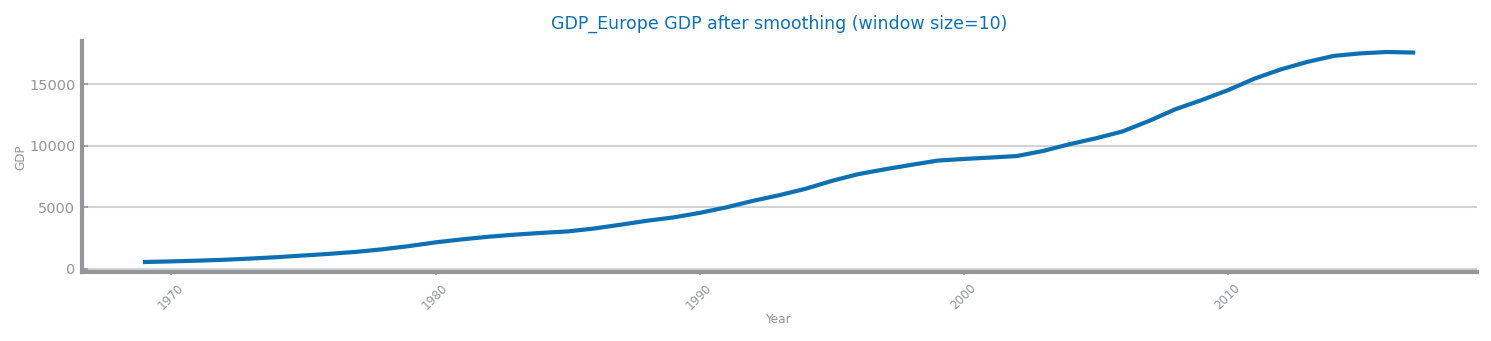

In [2]:
from pandas import Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

# Apply smoothing with a rolling window
WIN_SIZE = 10  # Adjust window size for smoothing (10 years for decadal smoothing)
ss_smooth: Series = series.rolling(window=WIN_SIZE).mean()

# Plot the smoothed series
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss_smooth.index.to_list(),
    ss_smooth.to_list(),
    xlabel="Year",  # Correct x-axis label
    ylabel=target,  # Correct y-axis label
    title=f"{file_tag} {target} after smoothing (window size={WIN_SIZE})",  # Updated title
)
show()


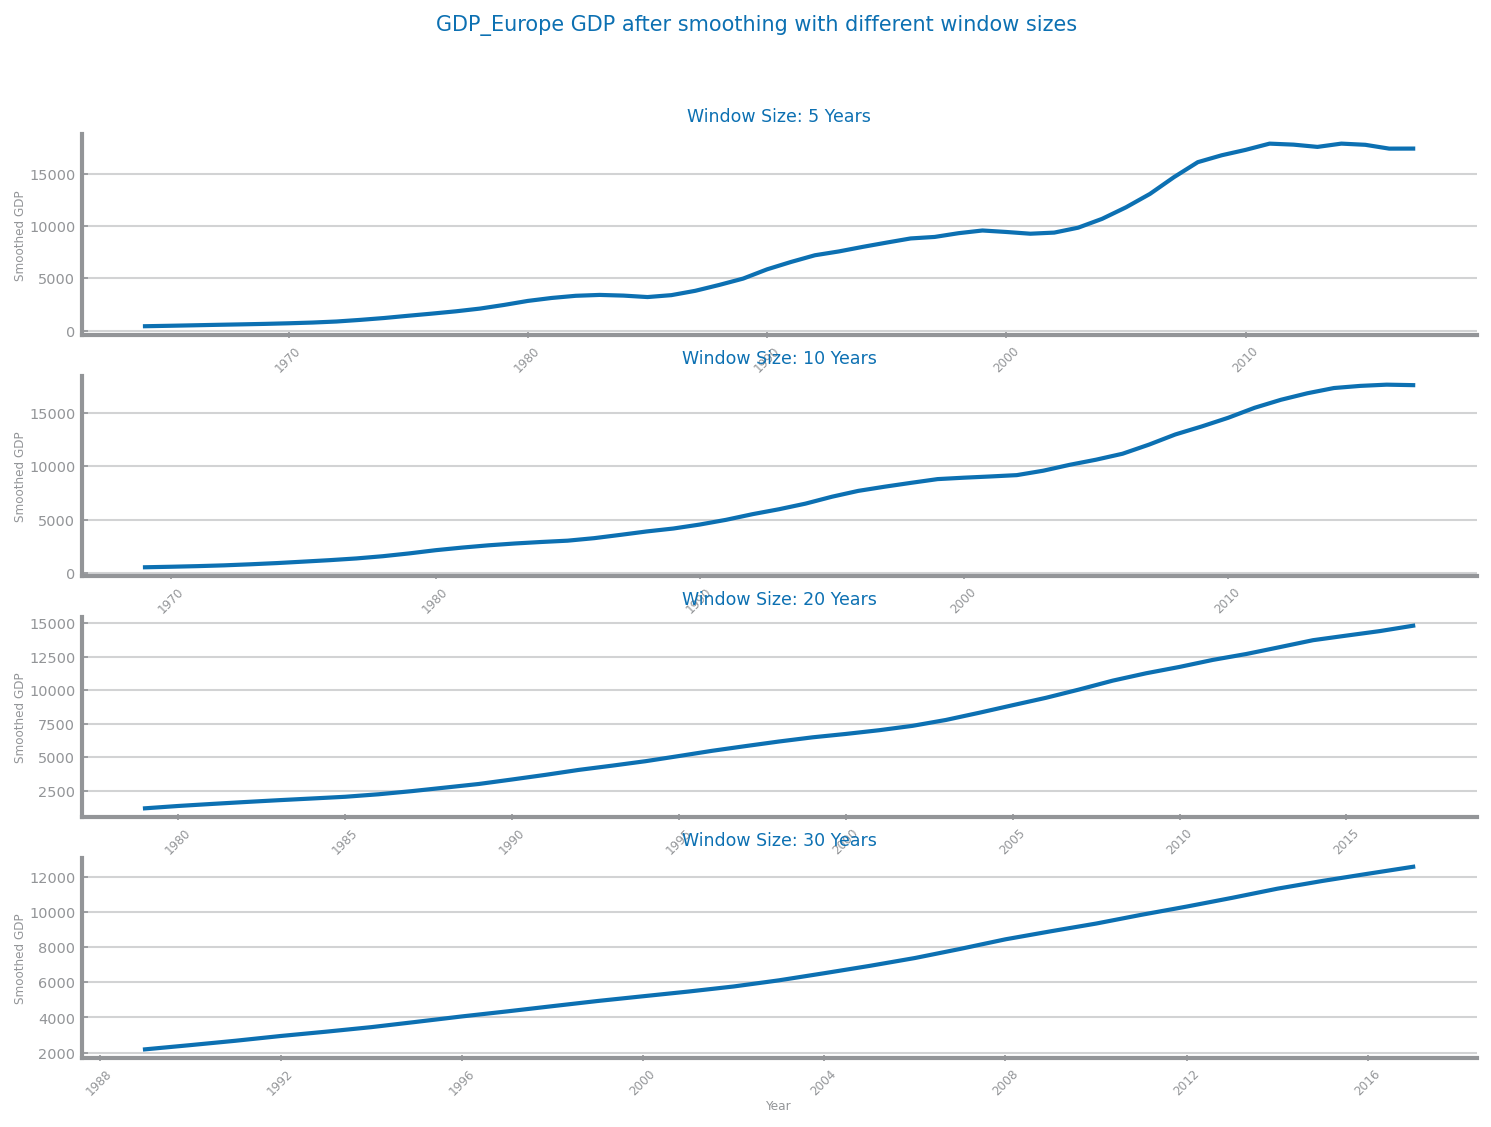

In [3]:
from matplotlib.pyplot import subplots, show
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from pandas import Series
from dslabs_functions import plot_line_chart, HEIGHT

# Define different window sizes (e.g., years for smoothing)
sizes: list[int] = [5, 10, 20, 30]  # Adjusted to represent yearly smoothing windows

# Create subplots
fig: Figure
axs: list[Axes]
fig, axs = subplots(len(sizes), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(sizes)))
fig.suptitle(f"{file_tag} {target} after smoothing with different window sizes")

# Apply smoothing for each window size and plot
for i in range(len(sizes)):
    ss_smooth: Series = series.rolling(window=sizes[i]).mean()  # Rolling mean for each window size
    plot_line_chart(
        ss_smooth.index.to_list(),
        ss_smooth.to_list(),
        ax=axs[i],
        xlabel="Year" if i == len(sizes) - 1 else "",  # Label x-axis only on the last subplot
        ylabel=f"Smoothed {target}",  # Indicate smoothed target
        title=f"Window Size: {sizes[i]} Years",  # Add window size in title
    )

# Show the plots
show()
